<a href="https://colab.research.google.com/github/NemoStar123/AAI2026/blob/main/DVGAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48841 entries, 0 to 48840
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48841 non-null  int64 
 1   workclass       48841 non-null  object
 2   fnlwgt          48841 non-null  int64 
 3   education       48841 non-null  object
 4   education-num   48841 non-null  int64 
 5   marital-status  48841 non-null  object
 6   occupation      48841 non-null  object
 7   relationship    48841 non-null  object
 8   race            48841 non-null  object
 9   sex             48841 non-null  object
 10  capital-gain    48841 non-null  int64 
 11  capital-loss    48841 non-null  int64 
 12  hours-per-week  48841 non-null  int64 
 13  native-country  48841 non-null  object
 14  income          48841 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


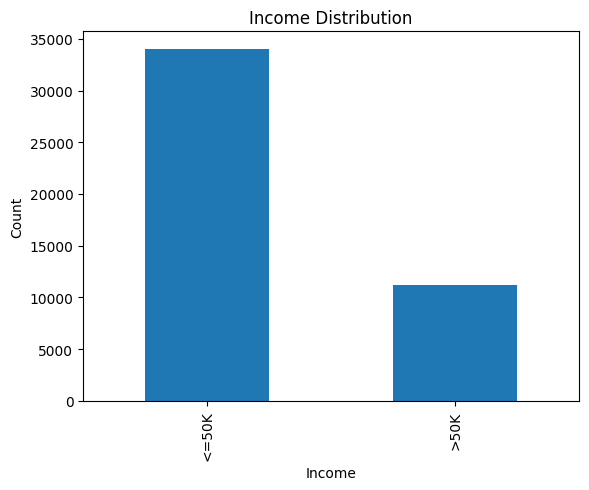

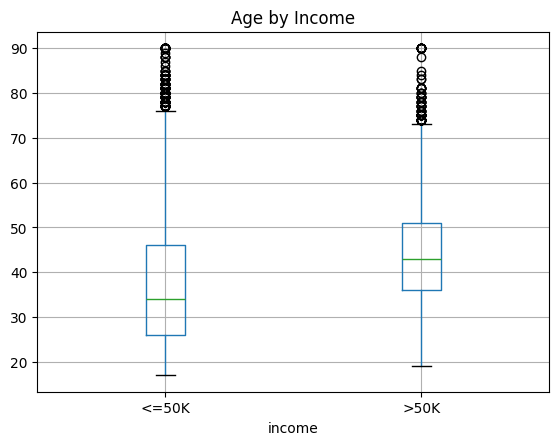

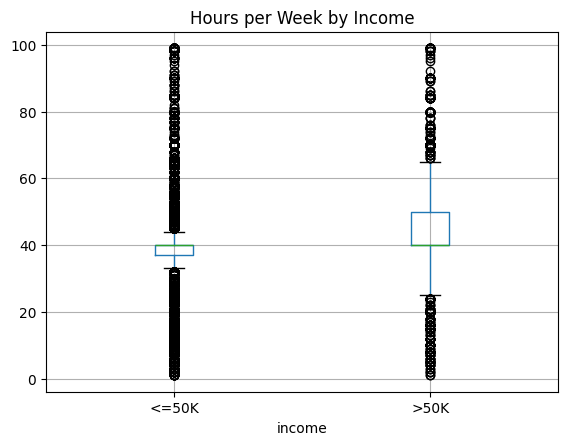

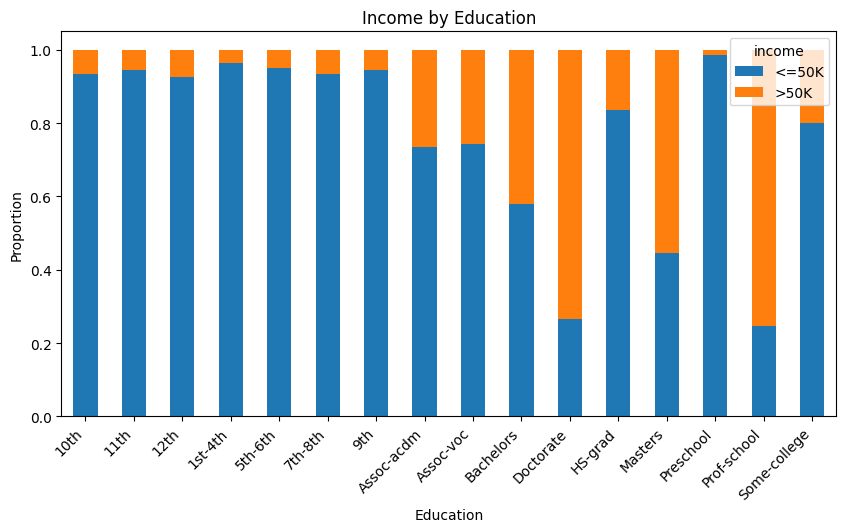

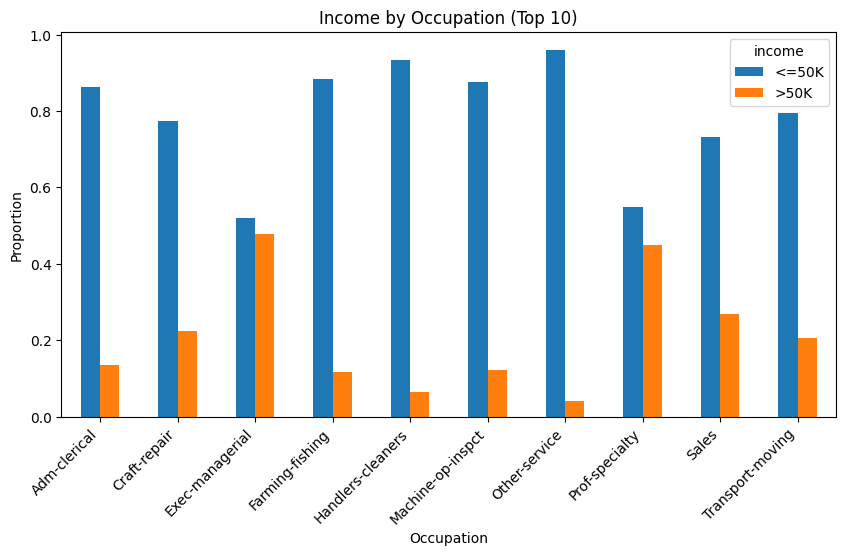

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# load data
df = pd.read_csv("adult-all-1.csv")

# fix column names potentially missing
adult_columns = ["age", "workclass", "fnlwgt", "education", "education-num","marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"]
if len(df.columns) == 15 and "income" not in df.columns:
    df.columns = adult_columns

# explore data
df.head()
df.shape
df.columns
df.info()
df.describe(include="all")

# clean  the data up
df = df.replace(r"^\s*\?$", pd.NA, regex=True)
for col in df.select_dtypes(include="object").columns:
    df[col] = df[col].astype("string").str.strip()
df = df.dropna()

# basic graphing I think
df["income"].value_counts()
df.groupby("income")[["age", "hours-per-week"]].mean()
pd.crosstab(df["education"], df["income"])
pd.crosstab(df["education"], df["income"], normalize="index")

# income distribution hopefully
df["income"].value_counts().plot(kind="bar")
plt.title("Income Distribution")
plt.xlabel("Income")
plt.ylabel("Count")
plt.show()

# Income by age
df.boxplot(column="age", by="income")
plt.title("Age by Income")
plt.suptitle("")
plt.show()

# hours per week sorted by income
df.boxplot(column="hours-per-week", by="income")
plt.title("Hours per Week by Income")
plt.suptitle("")
plt.show()

# education vs income
pd.crosstab(df["education"], df["income"], normalize="index").plot(kind="bar", stacked=True, figsize=(10,5))
plt.title("Income by Education")
plt.xlabel("Education")
plt.ylabel("Proportion")
plt.xticks(rotation=45, ha="right")
plt.show()

# jobs vs income
top_occ = df["occupation"].value_counts().head(10).index
pd.crosstab(
    df[df["occupation"].isin(top_occ)]["occupation"],
    df["income"],
    normalize="index").plot(kind="bar", figsize=(10,5))
plt.title("Income by Occupation (Top 10)")
plt.xlabel("Occupation")
plt.ylabel("Proportion")
plt.xticks(rotation=45, ha="right")
plt.show()
